In [4]:
import cv2
import mediapipe as mp
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [5]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import sys
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.data import Dataset

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [7]:
%run ../Funkcije.ipynb

In [8]:
train_path = 'D:\Projekat 2022\dataset\Synthetic ASL Alphabet\Train_Alphabet'
test_path = 'D:\Projekat 2022\dataset\Synthetic ASL Alphabet\Test_Alphabet'

In [9]:
max_samples = 300
min_samples = 300
img_size = (128, 128)
batch_size = 30

horizontal_flip = True
rotation_range = 25
width_shift_range = .25
height_shift_range = .3
zoom_range = .4

after trimming, the maximum samples in any class is now  300  and the minimum samples in any class is  300
Found 7200 validated image filenames belonging to 24 classes.          for train generator 
Found 2160 validated image filenames belonging to 24 classes.          for valid generator 
Found 2400 validated image filenames belonging to 24 classes.          for test generator 
test batch size:  80   test steps:  30  number of classes :  24


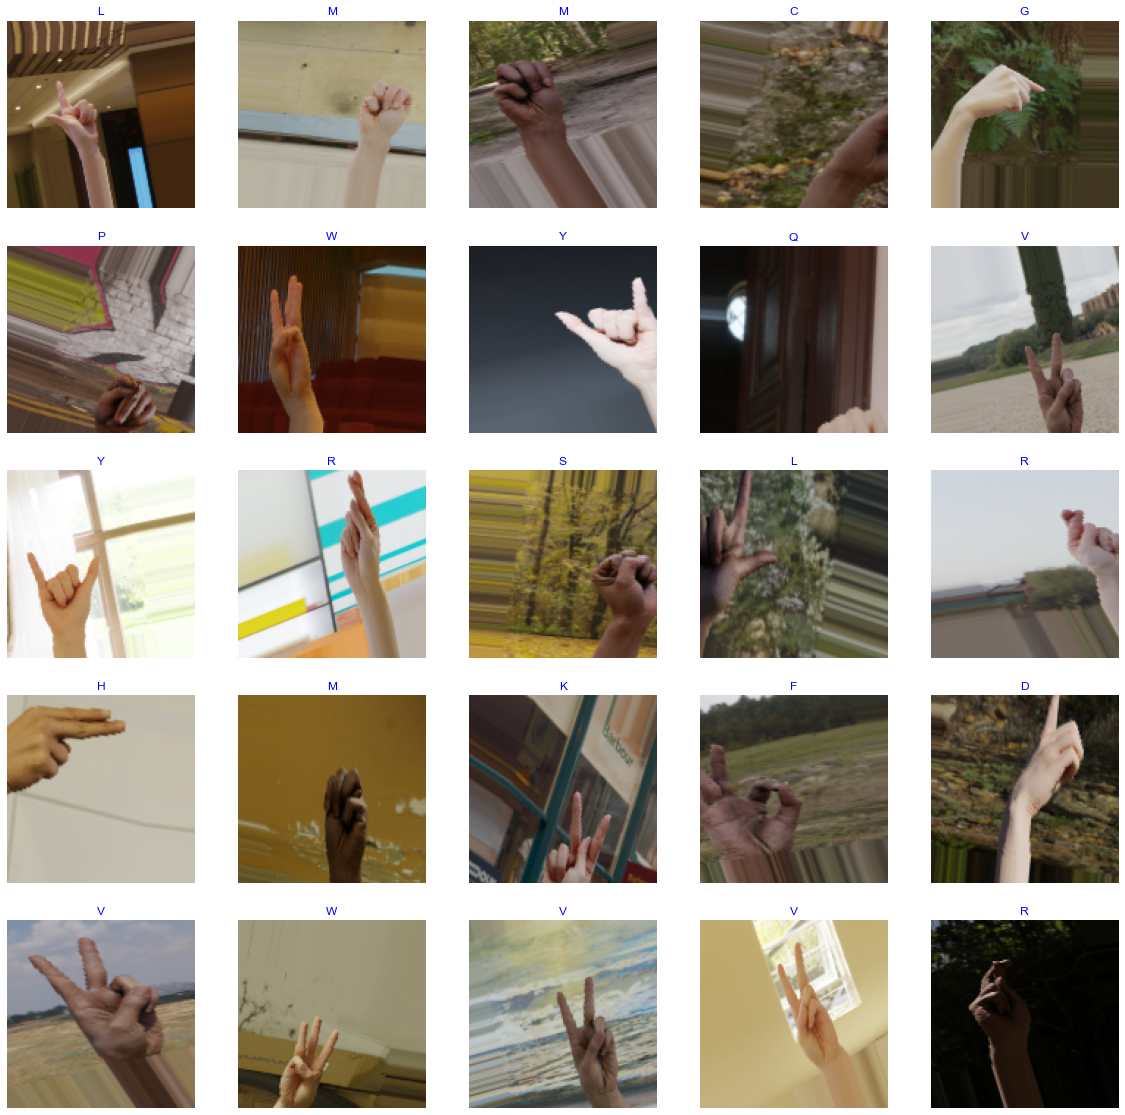

In [10]:
train_gen, test_gen, valid_gen = load_dataset(train_path, test_path,
                                             max_samples = max_samples,
                                             min_samples = min_samples,
                                             img_size = img_size,
                                             batch_size = batch_size,
                                             horizontal_flip = horizontal_flip,
                                             rotation_range = rotation_range,
                                             width_shift_range = width_shift_range,
                                             height_shift_range = height_shift_range,
                                             zoom_range = zoom_range)

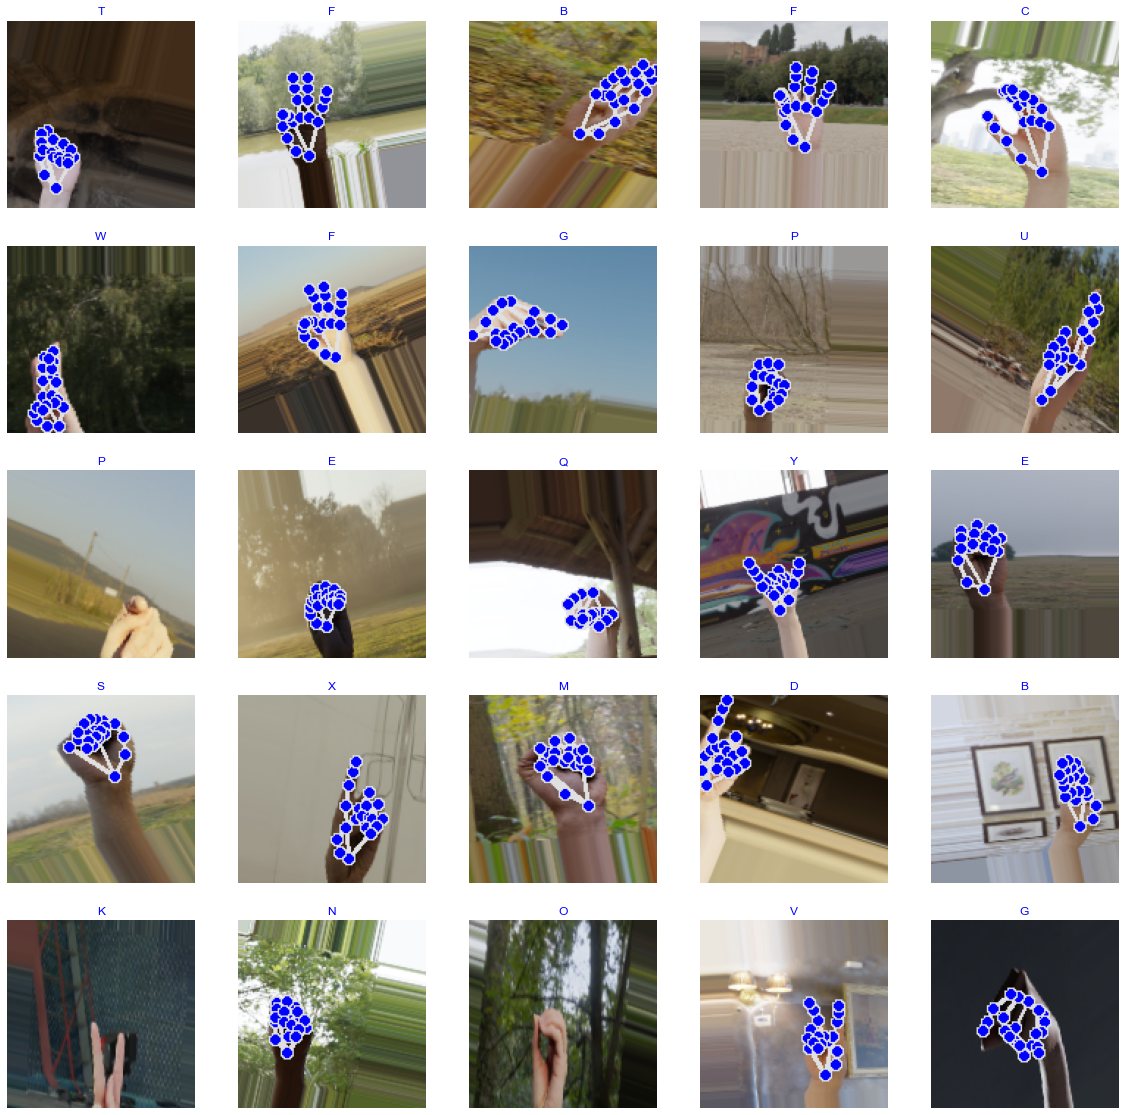

In [11]:
show_image_samples_with_landmarks(train_gen)

In [16]:
def write_keypoint_database(num_of_train_samples,
                            num_of_test_samples,
                            num_of_valid_samples,
                            train_gen,
                            test_gen,
                            valid_gen,
                            data_path):

    num_of_train_samples = num_of_train_samples
    num_of_test_samples = num_of_test_samples
    num_of_valid_samples = num_of_valid_samples

    train_x, train_y = generate_keypoint_sequential(generator = train_gen,
                                                    num_of_samples = num_of_train_samples,
                                                    include_z = True)

    test_x, test_y = generate_keypoint_sequential(generator = test_gen,
                                                    num_of_samples = num_of_test_samples,
                                                    include_z = True)

    valid_x, valid_y = generate_keypoint_sequential(generator = valid_gen,
                                                    num_of_samples = num_of_valid_samples,
                                                    include_z = True)

    save_keypoint_dataset(data_path, train_x, train_y, test_x, test_y, valid_x, valid_y)

In [46]:
def generate_keypoint_sequential(generator, num_of_samples, include_z = False):
    
    mpHands = mp.solutions.hands
    hands = mpHands.Hands(max_num_hands = 1, static_image_mode=True, min_detection_confidence = 0.3)
    mpDraw = mp.solutions.drawing_utils
 
    n = 2
    if include_z:
        n = 3
    
    data = np.zeros((num_of_samples * 24, 21 * n))
    lb_count = np.zeros(24)
    labels = []
    
    samples = 0
    
    for batch in generator:
        for i in range(batch[0].shape[0]):
            img = batch[0][i].astype('uint8')
            label = batch[1][i] 
            label_name = np.where(label == max(label))[0][0]
            
            if lb_count[label_name] >= num_of_samples:
                continue
            
            results = hands.process(img)
            
            if results.multi_hand_landmarks:
                for handLms in results.multi_hand_landmarks:
                    
                    i = 0
                    
                    for id, lm in enumerate(handLms.landmark):
                        
                        data[samples][i] = lm.x
                        i += 1
                        data[samples][i] = lm.y
                        i += 1
                        if include_z: 
                            data[samples][i] = lm.y
                            i += 1
                            
                labels.append(label)
                lb_count[label_name] += 1
                samples += 1
                message = str(samples)
                sys.stdout.write('\r'+ "Generated  " + message + "  samples out of  " + str(num_of_samples * 24) + "  samples")
                #print("Generated  ", samples, "  samples")
                
                if samples >= num_of_samples * 24:
                    break

        if samples >= num_of_samples * 24:
            break
    
    sys.stdout.write('\r'+ "DONE: Generated  " + message + "  samples")
    exit_labels = np.array(labels)
    
    return data, exit_labels

In [47]:
def save_keypoint_dataset(data_path, train_x, train_y, test_x, test_y, valid_x, valid_y):

        np.save(data_path + 'train/train_x', train_x)
        np.save(data_path + 'train/train_y', train_y)
        
        np.save(data_path + 'test/test_x', test_x)
        np.save(data_path + 'test/test_y', test_y)
        
        np.save(data_path + 'valid/valid_x', valid_x)
        np.save(data_path + 'valid/valid_y', valid_y)

In [48]:
data_path = r'../dataset/Synthetic ASL Alphabet - keypoints/' 

In [49]:
num_of_train_samples = 500
num_of_test_samples = 50
num_of_valid_samples = 50

In [50]:
# GENERISANJE KEYPOINT BAZE
# TRAJE DUGO

data_path = r'../dataset/Synthetic ASL Alphabet - keypoints/' 
write_keypoint_database(num_of_train_samples,
                            num_of_test_samples,
                            num_of_valid_samples,
                            train_gen,
                            test_gen,
                            valid_gen,
                            data_path)

DONE: Generated  1200  samplesf  1200  sampleses